In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
all_data = pd.read_csv('../asos_train.csv', encoding='cp949')

#     ['영암에프원태양광b', '[서인천]발전부지내 태양광 1단계', '[서인천]발전부지내 태양광 1단계ESS',
#        '[서인천]발전부지내 태양광 2단계', '군산복합2단계태양광', '군산복합2단계태양광ESS', '대전 학하 연료전지',
#        '삼랑진태양광#1', '삼랑진태양광#2', '서인천연료전지', '서인천연료전지2',
#        '세종시수질복원센터태양광연계 ESS', '수질복원센터태양광', '의왕 연료전지', '장흥풍력', '천안청수연료전지']

# relevant_loc = ['영암에프원태양광b','[서인천]발전부지내 태양광 1단계','[서인천]발전부지내 태양광 2단계',
#                 '삼랑진태양광#1', '삼랑진태양광#2', '수질복원센터태양광']

relevant_loc = ['영암에프원태양광b']

all_data = all_data[all_data['name'].isin(relevant_loc)]


all_data['date'] = pd.to_datetime(all_data['date'])
all_data['year'] = all_data['date'].dt.year
all_data['month'] = all_data['date'].dt.month
all_data['hour'] = all_data['date'].dt.hour
all_data['day'] = all_data['date'].dt.day


# Index(['power', 'date', 'name', 'capacities', 'asos_num', 'land', 'power/land',
#        'location', 'Date/Time', 'Temp(C)', 'Prec(mm)', 'Wind_speed(m/s)',
#        'Wind_Direction(16 compass points)', 'Humidity', 'Vapor_pressure(hPa)',
#        'Dew_Point(C)', 'Local Atmospheric Pressure(hPa)',
#        'Sea-level_Pressure(hPa)', 'sunshine(hr)', 'Solar_Radiation(MJ/m2)',
#        'Snowfall(cm)', '3-hour_Fresh_Snowfall', 'Cloud_Cover(1/10)',
#        'Mid-Low_Cloud_Cover', 'Cloud_Form', 'Lowest_Cloud_Height(100m)',
#        'Visibility(10m)', 'Ground_Condition', 'Phenomenon_Number',
#        'Ground Temp', '5cm_Underground_Temp', '10cm_Underground_Temp',
#        '20cm_Underground_Temp', '30cm_Underground_Temp'],
#       dtype='object')

drop_columns = [ "asos_num", "location", "capacities", "land",
               'Wind_Direction(16 compass points)', "Date/Time",
               'Sea-level_Pressure(hPa)',
               'Mid-Low_Cloud_Cover', 'Cloud_Form', 'Lowest_Cloud_Height(100m)', 'Ground_Condition', 'Phenomenon_Number',
                 '5cm_Underground_Temp', '10cm_Underground_Temp',
               '20cm_Underground_Temp', '30cm_Underground_Temp']

all_data = all_data.drop(columns=drop_columns)

all_data_train = all_data[all_data['year'].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])]
all_data_test = all_data[all_data['year'].isin([2021,2022])]

# NaN 비율 계산


#all_data_test = pd.concat([all_data_test, test_scaled_df], axis=1)


In [15]:
all_data.columns

Index(['date', 'name', 'power/land', 'Temp(C)', 'Prec(mm)', 'Wind_speed(m/s)',
       'Dew_Point(C)', 'sunshine(hr)', 'Solar_Radiation(MJ/m2)',
       'Snowfall(cm)', 'Cloud_Cover(1/10)', 'year', 'month', 'hour'],
      dtype='object')

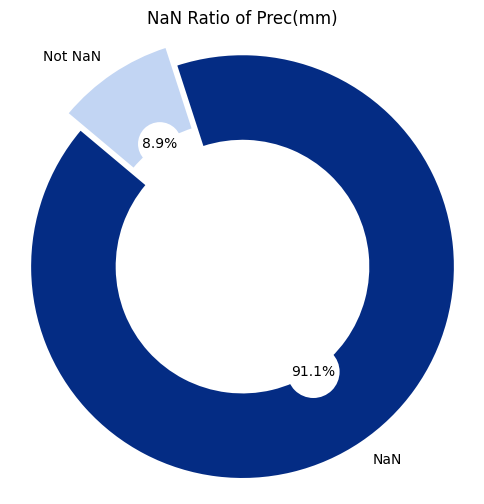

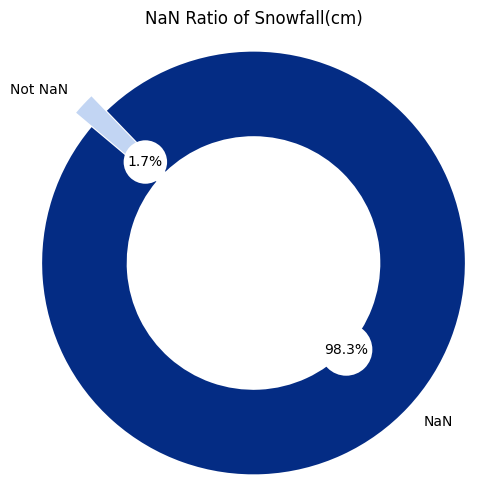

In [4]:
columns_to_plot = ['Prec(mm)', 'Snowfall(cm)']

for column in columns_to_plot:
    nan_ratio = all_data[column].isna().sum() / len(all_data)
    non_nan_ratio = 1 - nan_ratio

    labels = ['NaN', 'Not NaN']
    sizes = [nan_ratio, non_nan_ratio]
    colors = ['#042c84', '#c2d5f3']
    explode = (0.1, 0)

    plt.figure(figsize=(6, 6))
    
    wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
            shadow=False, startangle=140, wedgeprops=dict(width=0.4))
    
    # AutoText 인스턴스의 배경색을 설정합니다.
    for autotext in autotexts:
        autotext.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='circle,pad=0.3'))

    plt.axis('equal')
    plt.title(f'NaN Ratio of {column}')
    plt.show()


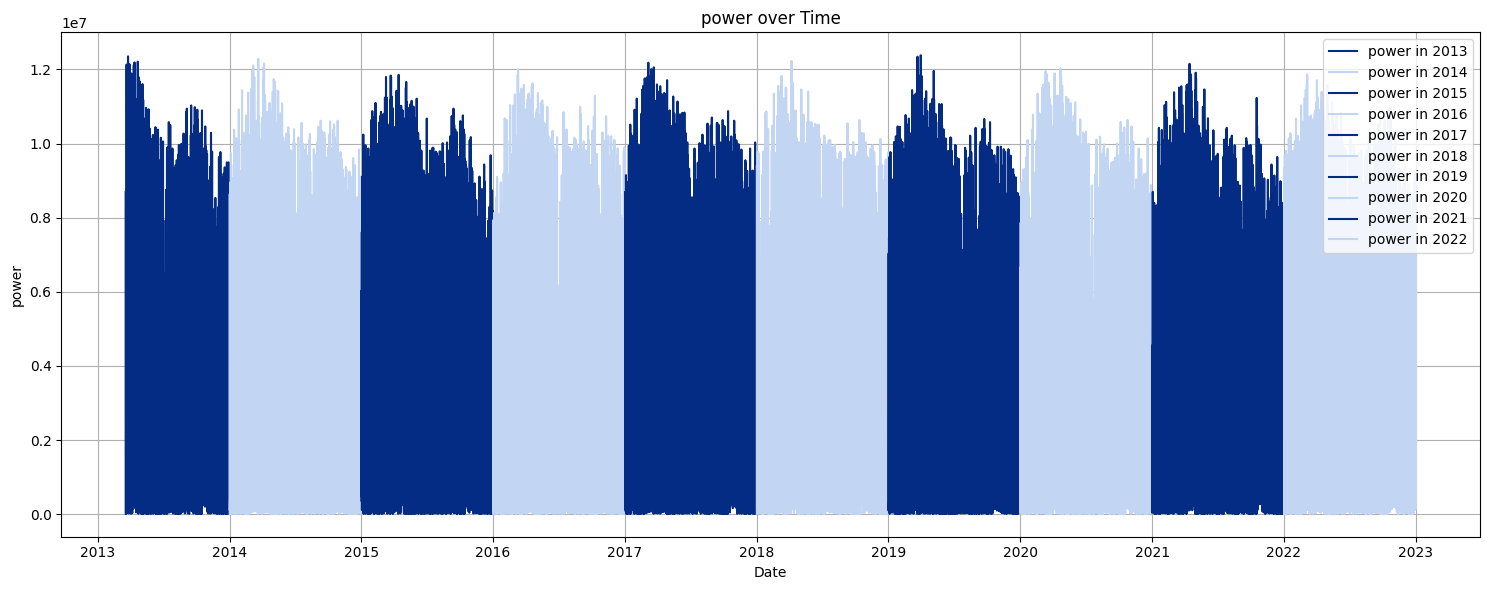

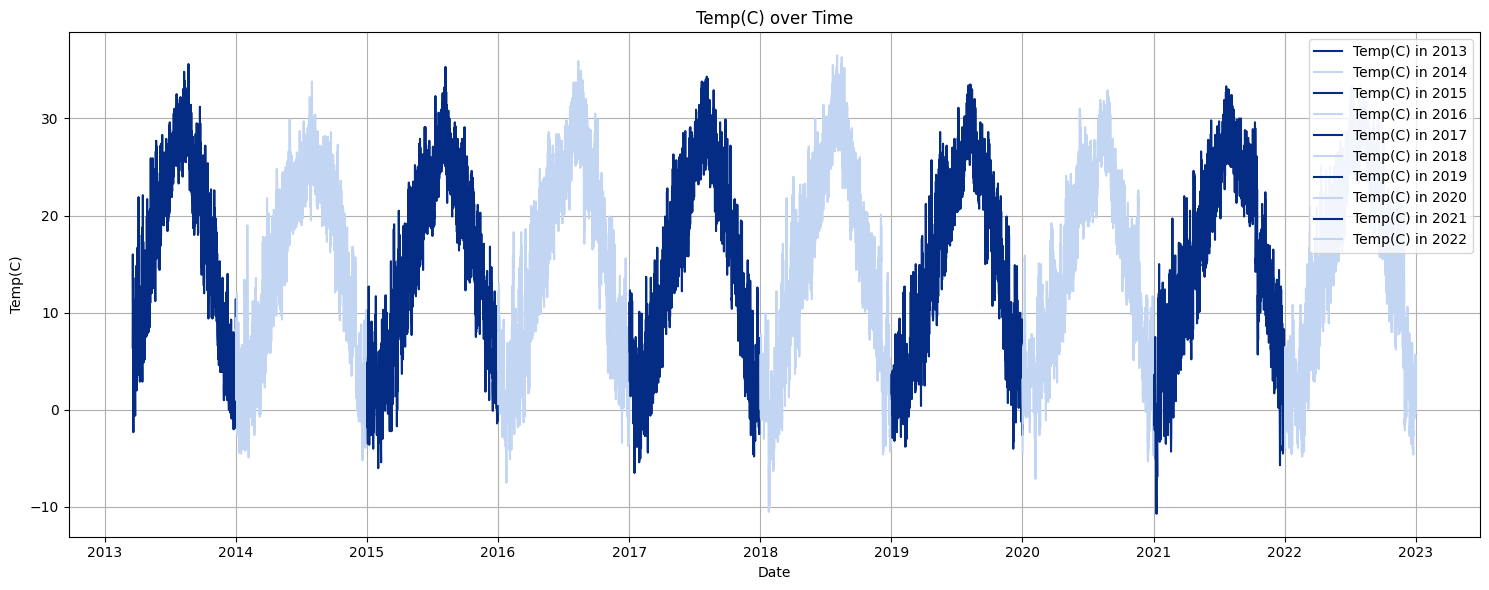

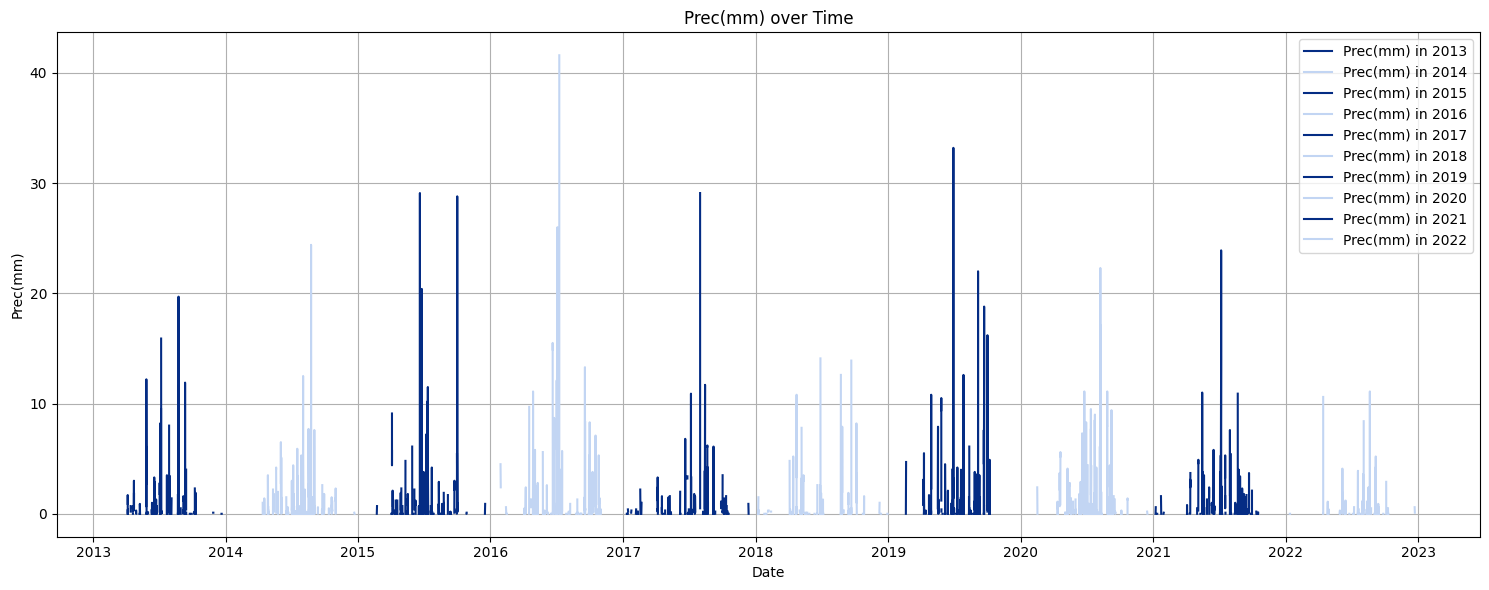

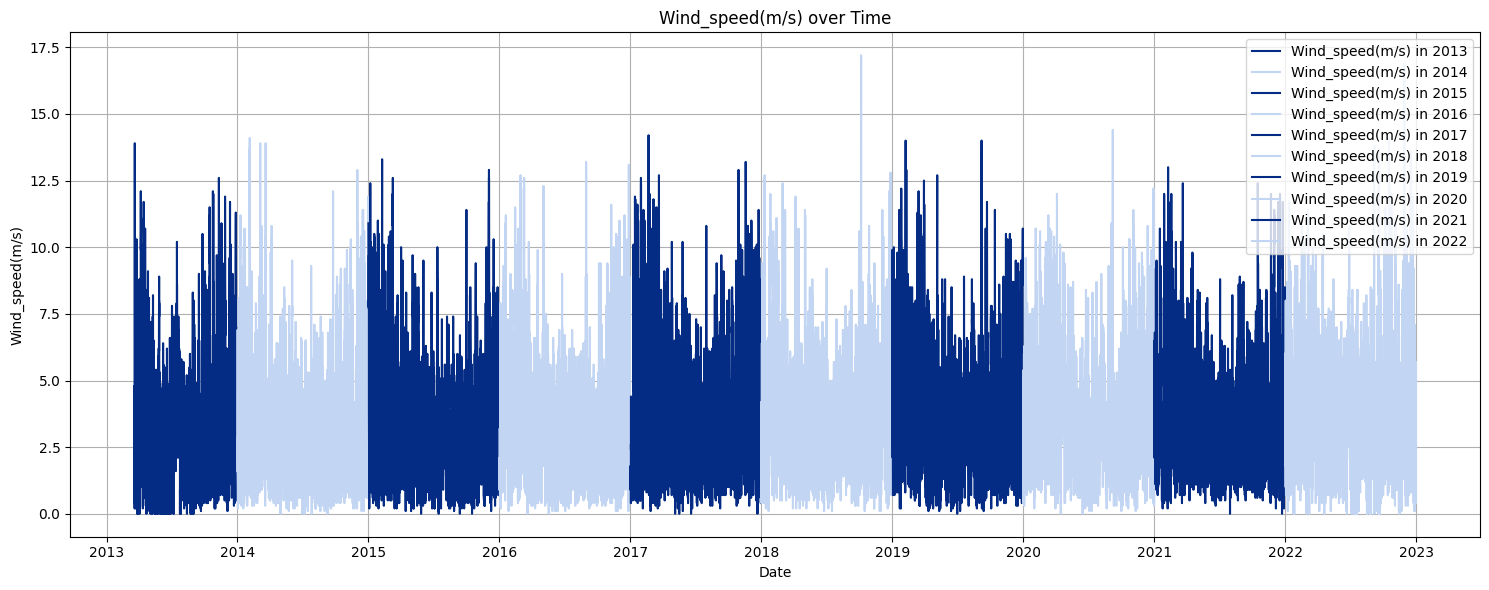

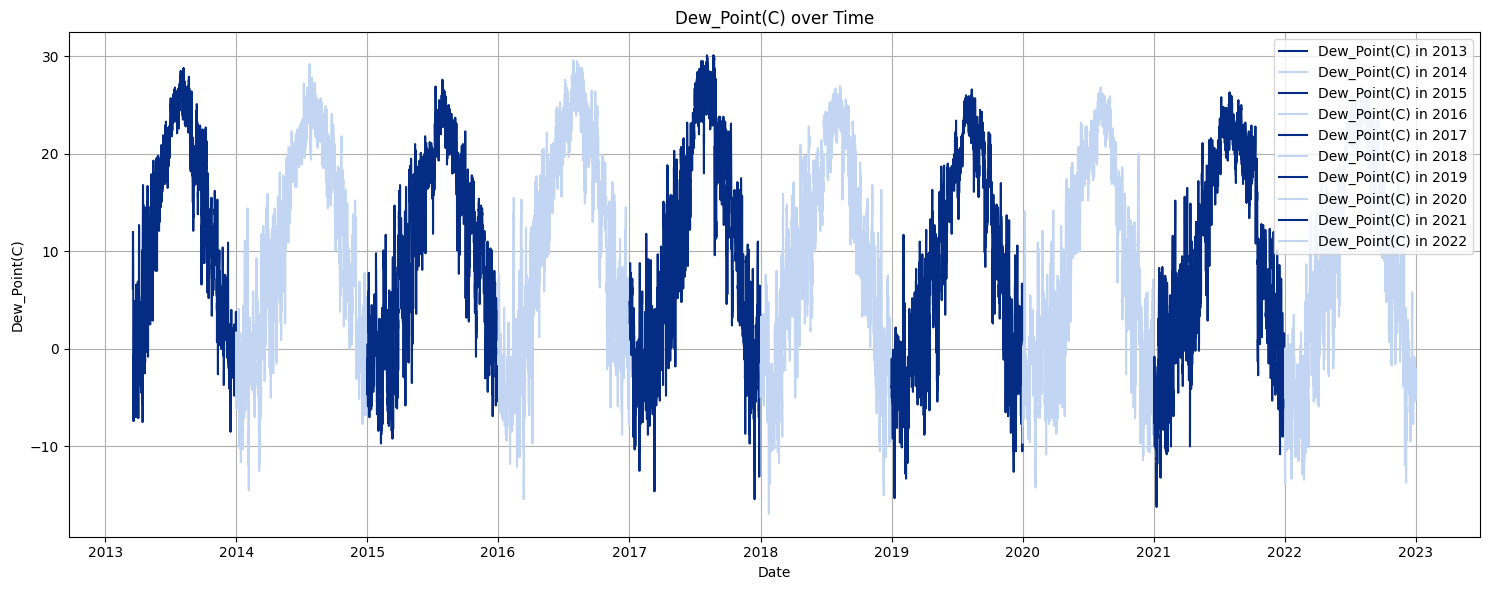

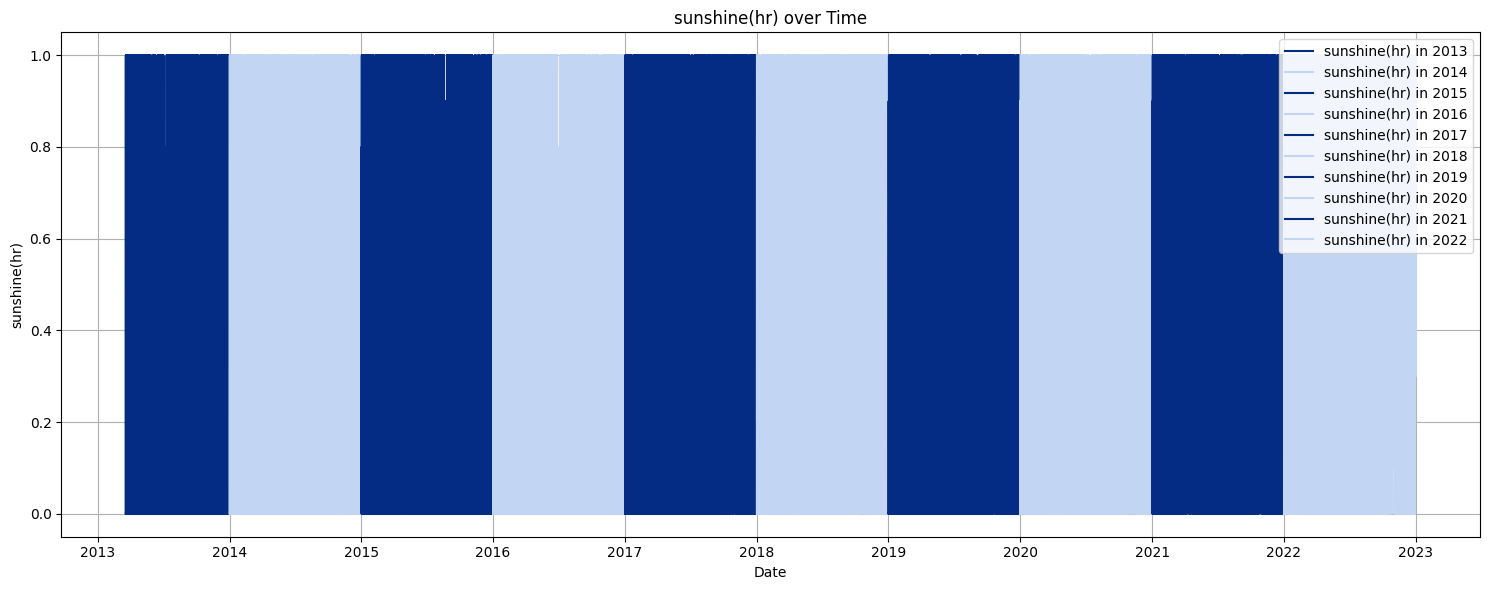

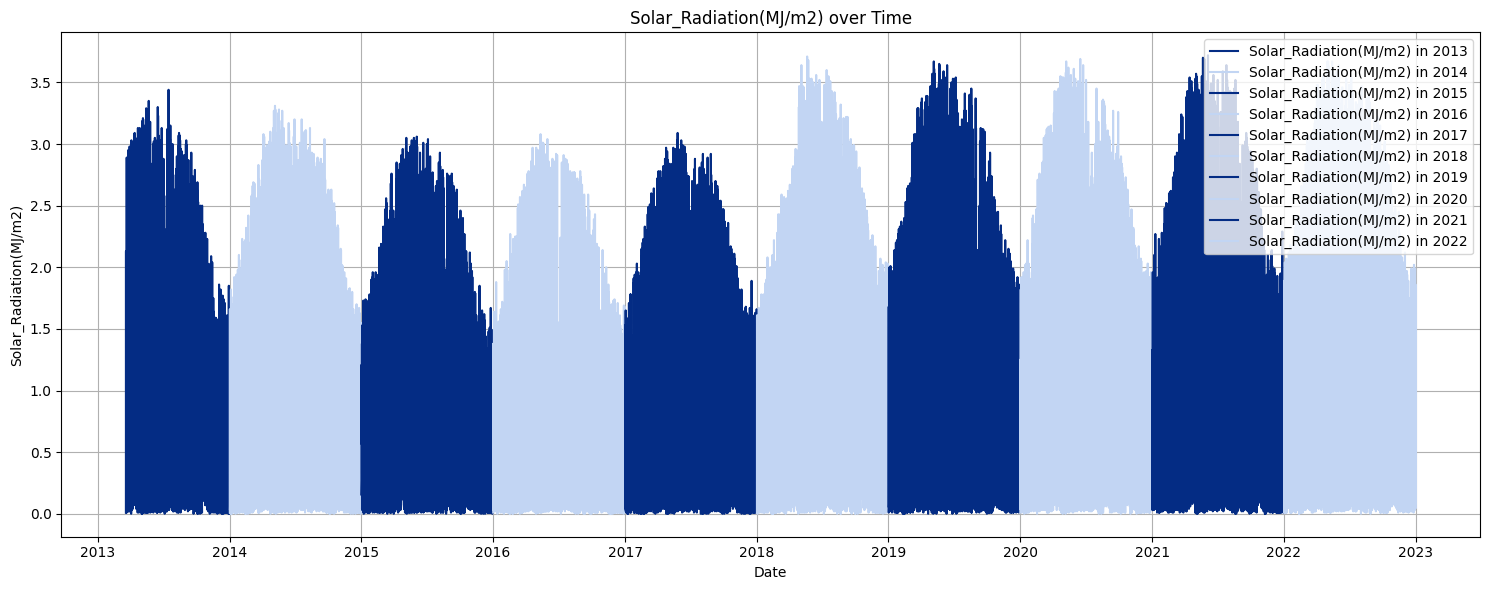

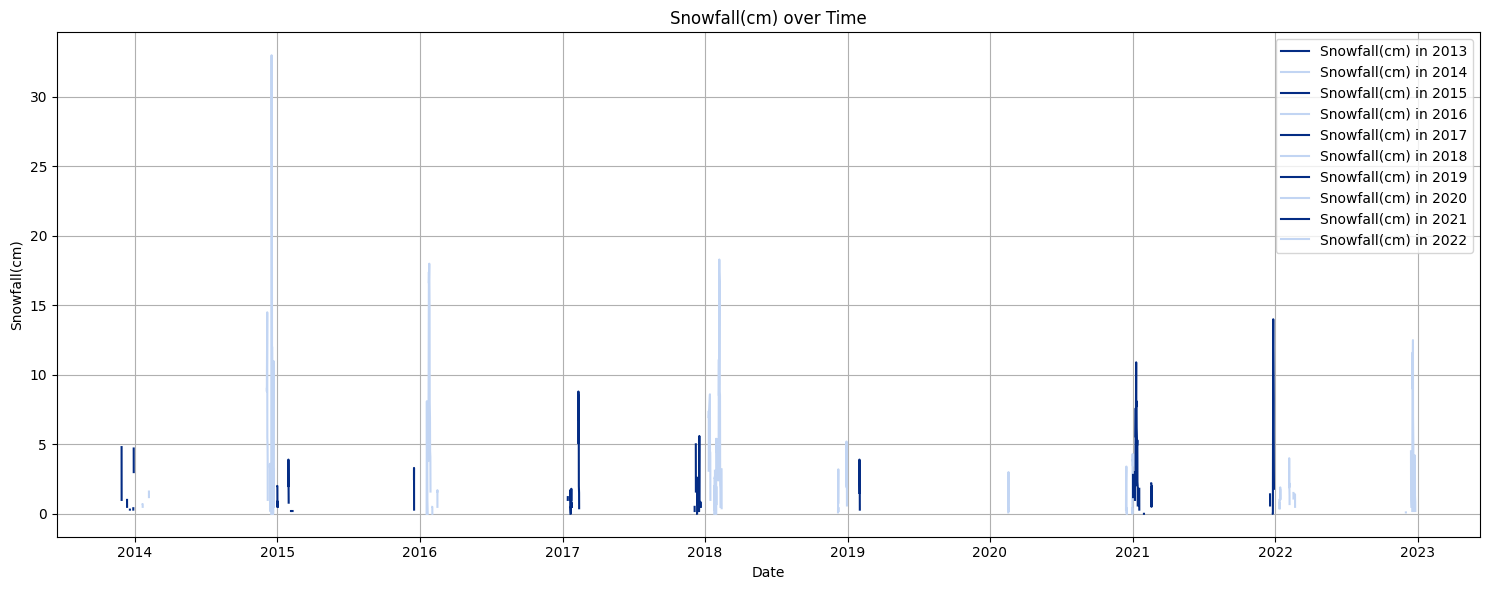

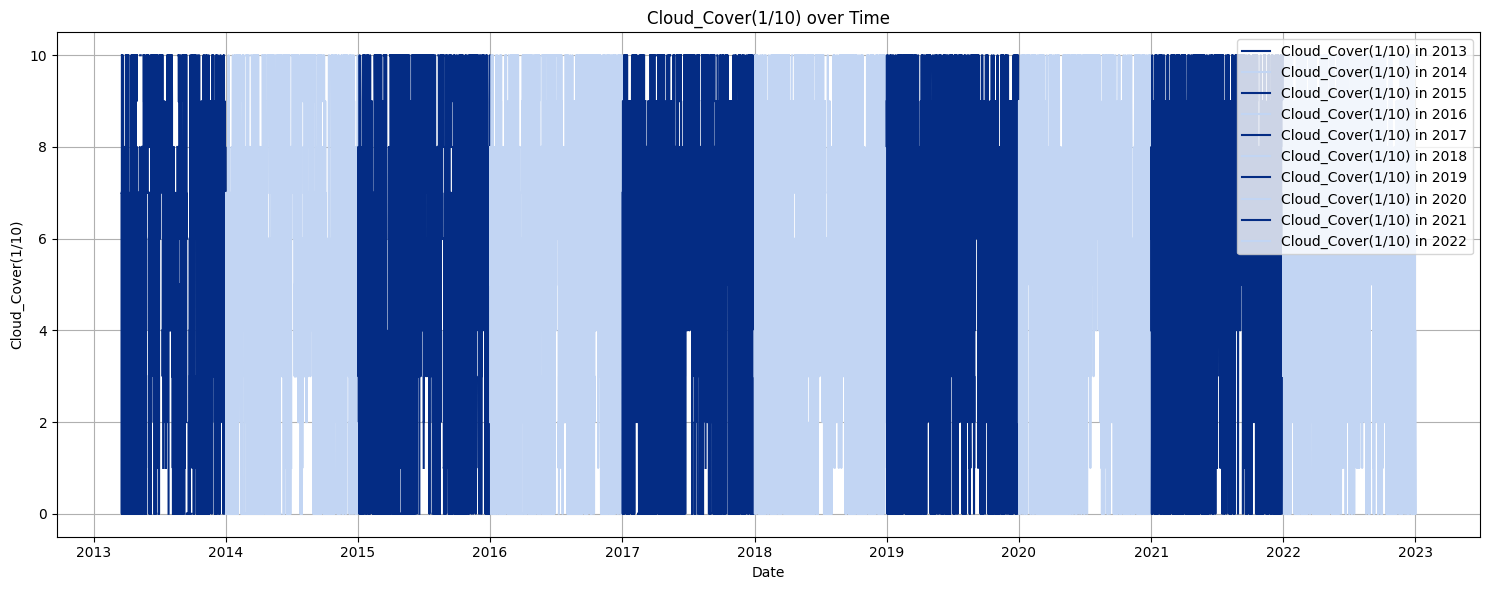

In [7]:
import matplotlib.pyplot as plt


# 데이터프레임을 date 칼럼으로 정렬
all_data = all_data.sort_values(by='date')

columns_to_plot = ['power', 'Temp(C)', 'Prec(mm)', 'Wind_speed(m/s)',
       'Dew_Point(C)', 'sunshine(hr)', 'Solar_Radiation(MJ/m2)',
       'Snowfall(cm)', 'Cloud_Cover(1/10)']

colors = ['#042c84', '#c2d5f3']
years = sorted(all_data['year'].unique())

for column in columns_to_plot:
    plt.figure(figsize=(15, 6))
    for idx, year in enumerate(years):
        yearly_data = all_data[all_data['year'] == year]
        plt.plot(yearly_data['date'], yearly_data[column], label=f"{column} in {year}", color=colors[idx % 2])
    plt.title(f'{column} over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


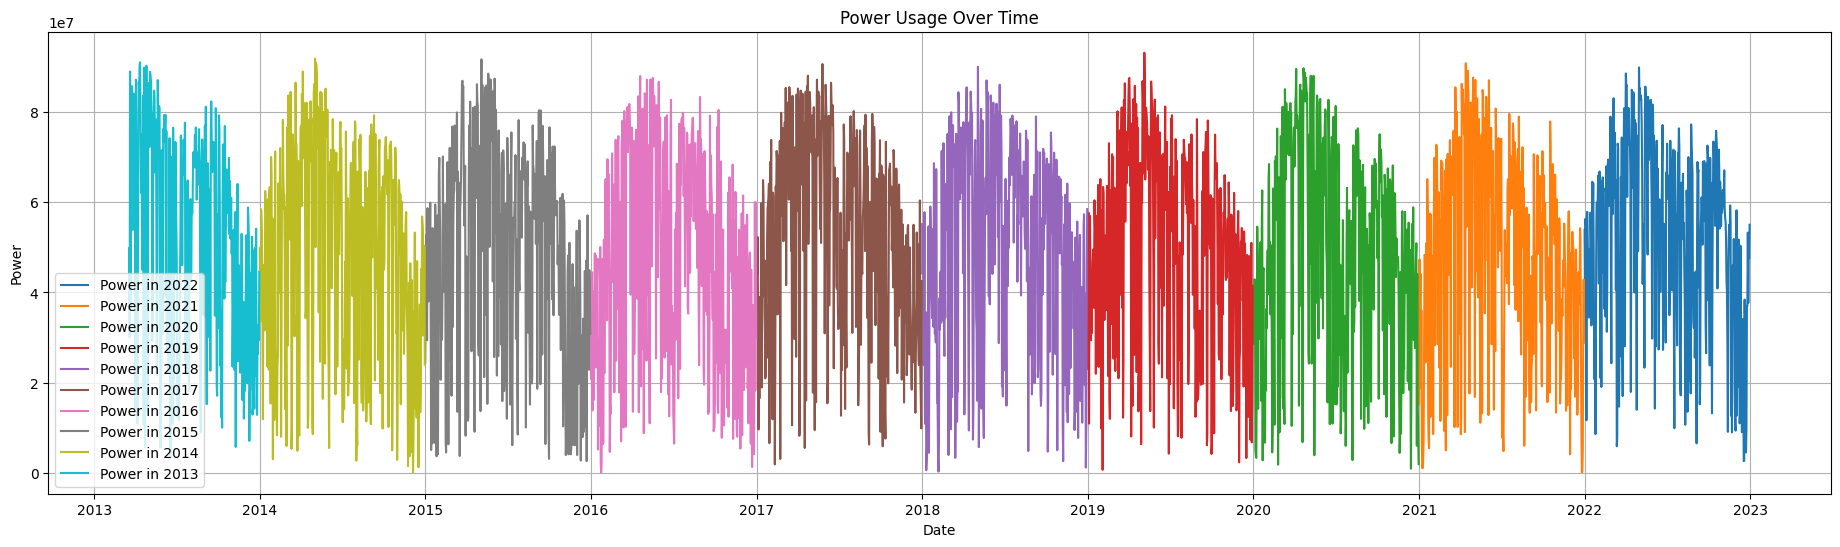

In [64]:
import matplotlib.pyplot as plt

# date 칼럼을 datetime 형식으로 생성
all_data['new_date'] = pd.to_datetime(all_data[['year', 'month', 'day']])

daily_power_sum = all_data.groupby('new_date')['power'].sum().reset_index()

plt.figure(figsize=(23, 6))

# 각 연도별로 그래프 그리기
for year in years:
    power_subset = daily_power_sum[daily_power_sum['new_date'].dt.year == year]
    plt.plot(power_subset['new_date'], power_subset['power'], label=f"Power in {year}")

# 제목, 레이블, 범례 등을 추가
plt.title('Power Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
daily_power_sum.head()

,year,month,day,power
0,2013,3,19,49795200.0
1,2013,3,20,30038400.0
2,2013,3,21,88963200.0
3,2013,3,22,37104000.0
4,2013,3,23,78297600.0


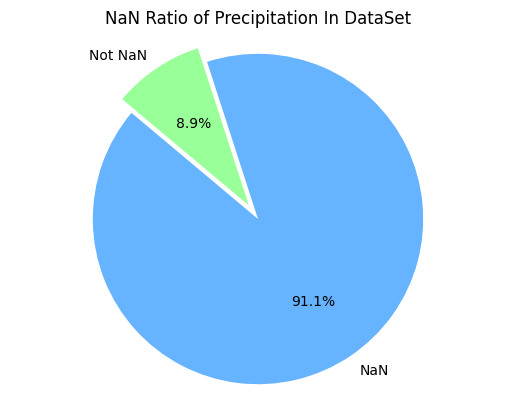

In [14]:

nan_ratio = all_data['Prec(mm)'].isna().sum() / len(all_data)
non_nan_ratio = 1 - nan_ratio

# 파이 차트 그리기
labels = ['NaN', 'Not NaN']
sizes = [nan_ratio, non_nan_ratio]
colors = ['#66b3ff','#99ff99']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.title('NaN Ratio of Precipitation In DataSet')
plt.show()

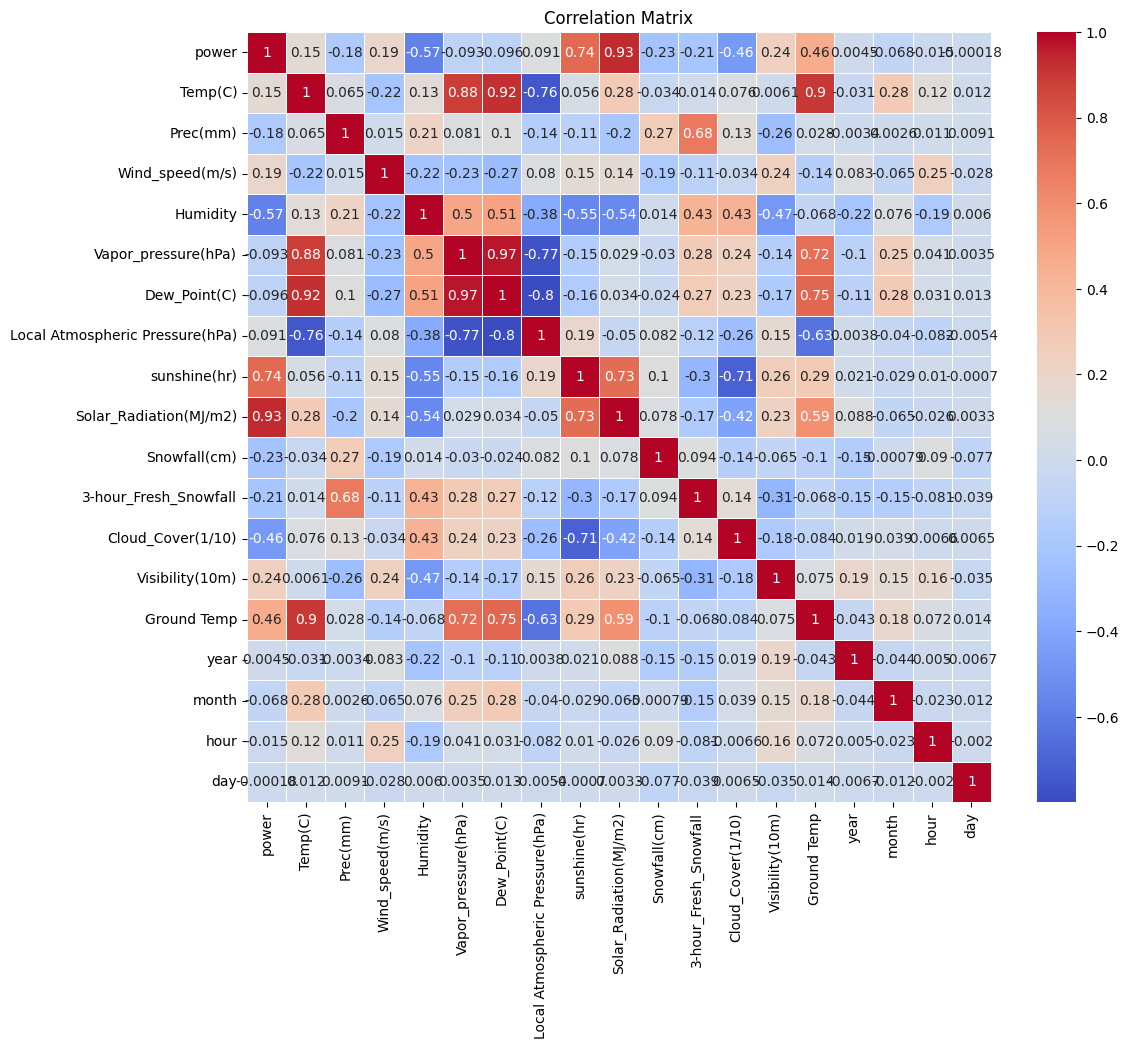

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# ['date', 'name', 'power/land', 'Temp(C)', 'Prec(mm)', 'Wind_speed(m/s)',
#        'Dew_Point(C)', 'sunshine(hr)', 'Solar_Radiation(MJ/m2)',
#        'Snowfall(cm)', 'Cloud_Cover(1/10)', 'year', 'month', 'hour']

drop_columns = ['date', 'name', 'power/land']

all_data = all_data.drop(columns=drop_columns)

# 상관계수 계산
correlation_matrix = all_data.corr()

# 상관계수 heatmap 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


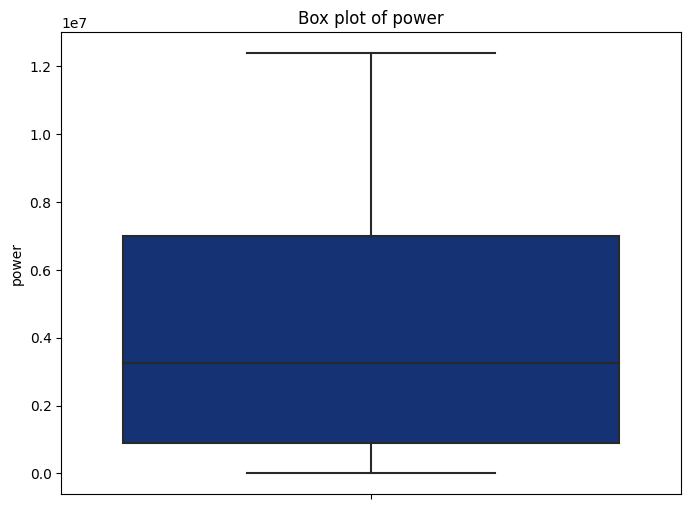

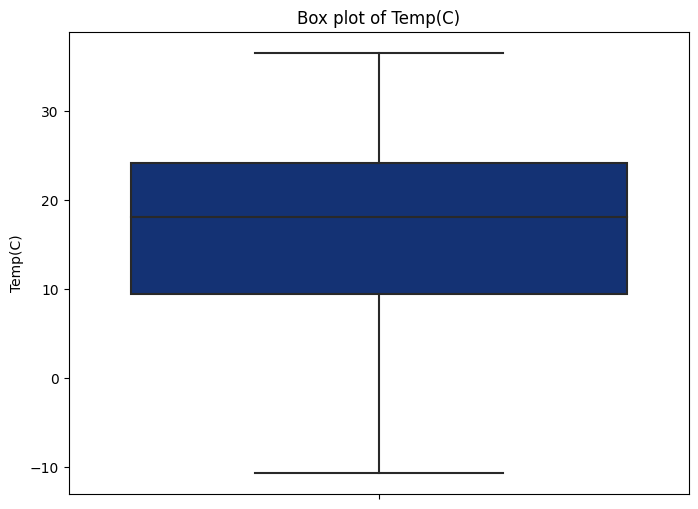

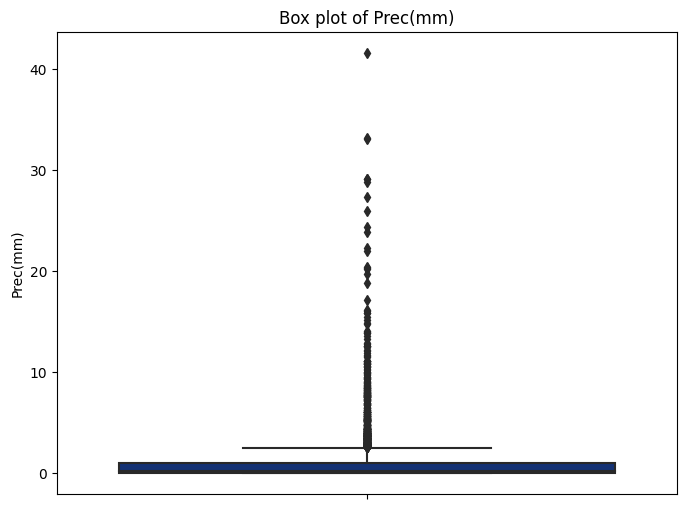

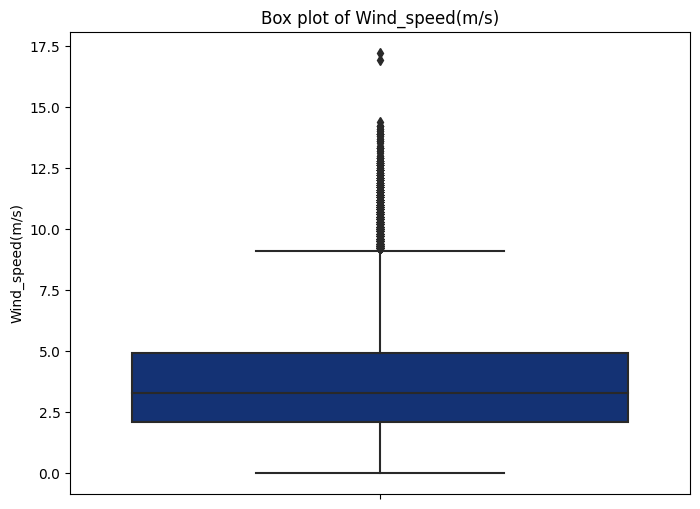

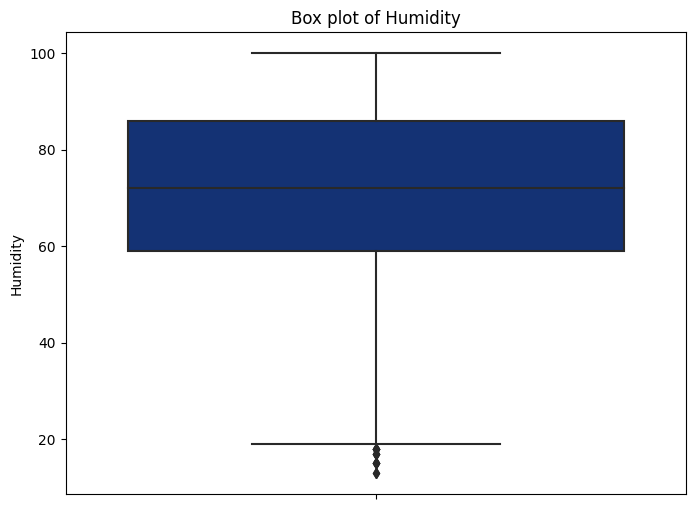

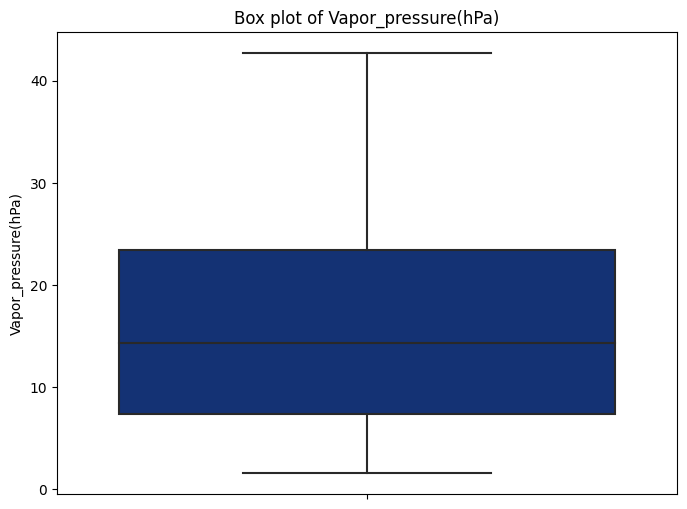

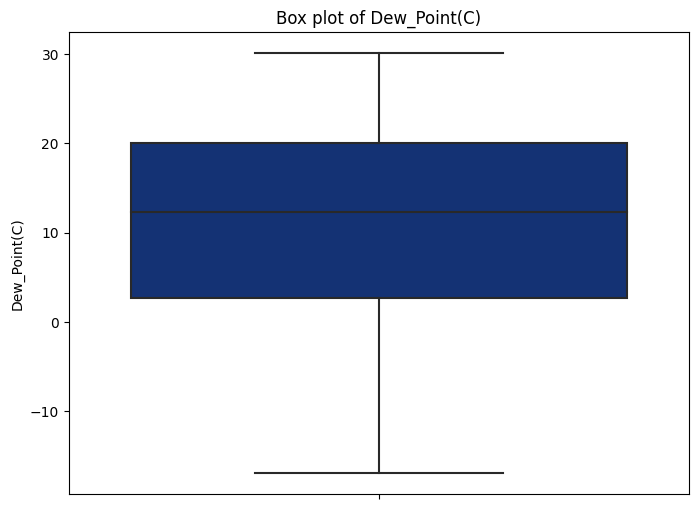

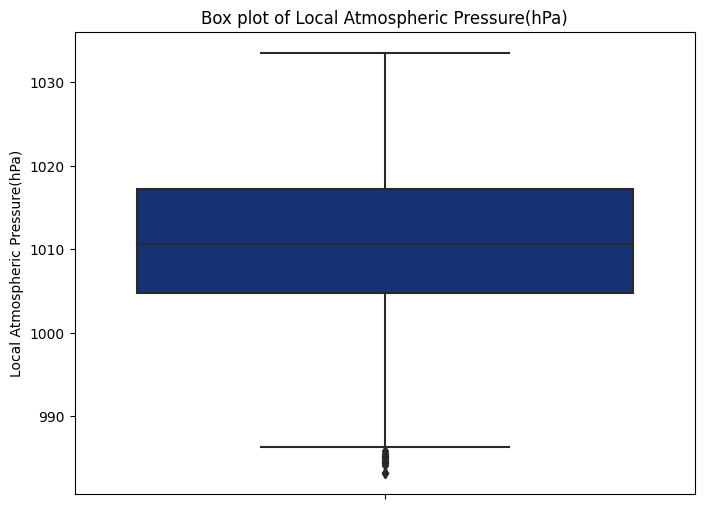

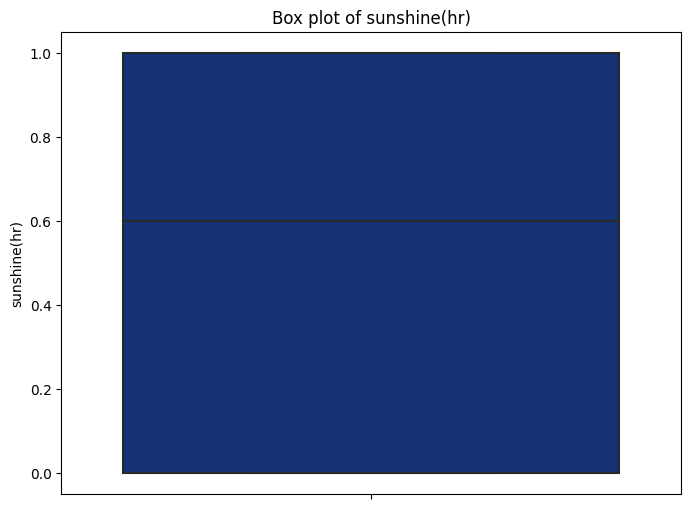

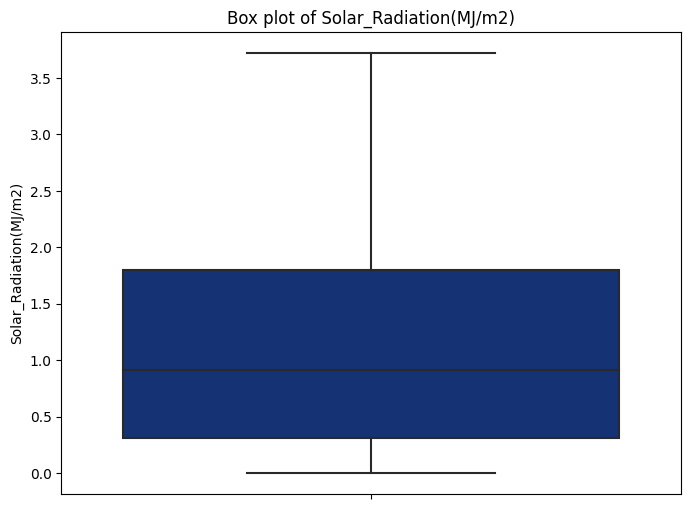

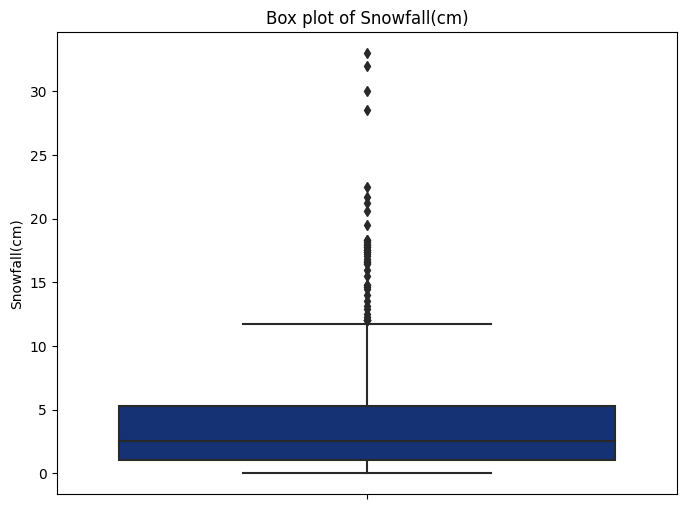

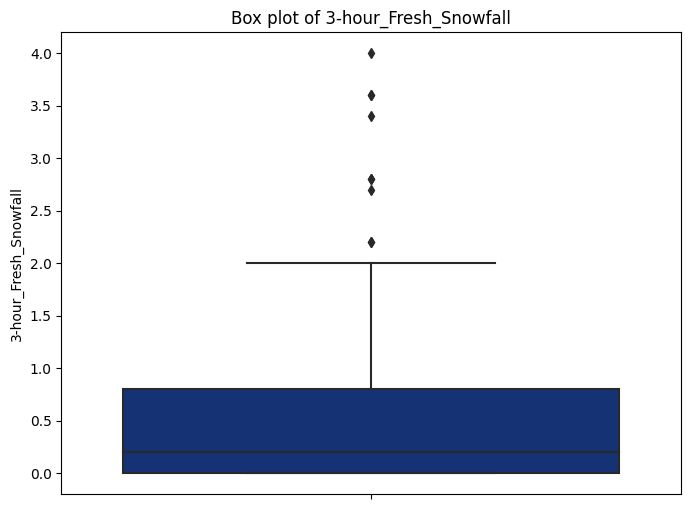

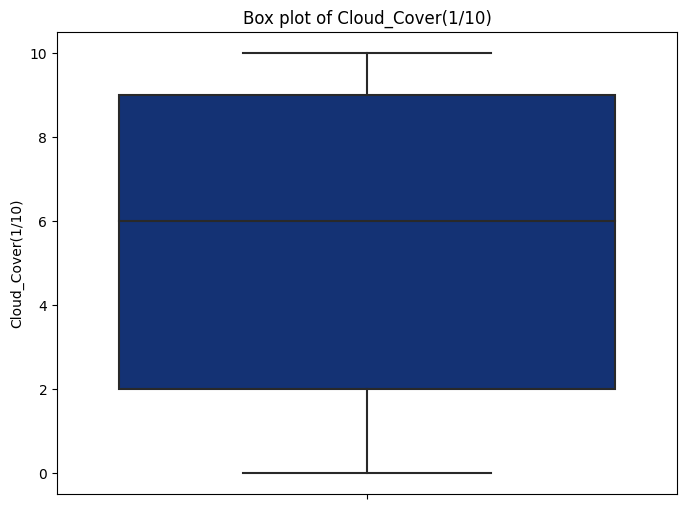

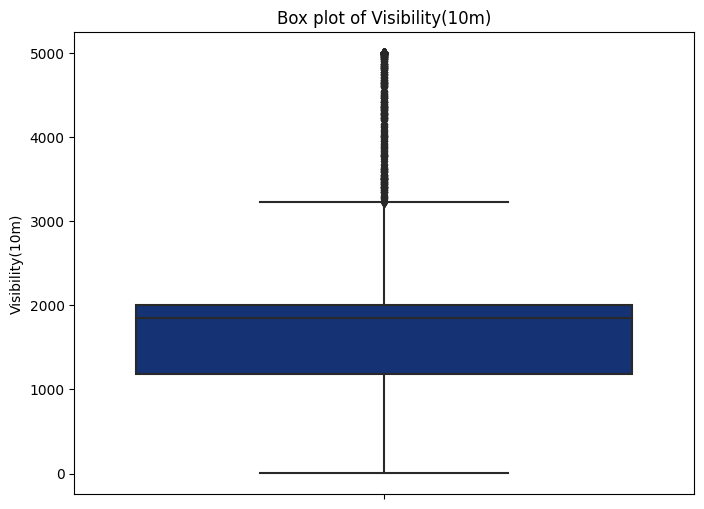

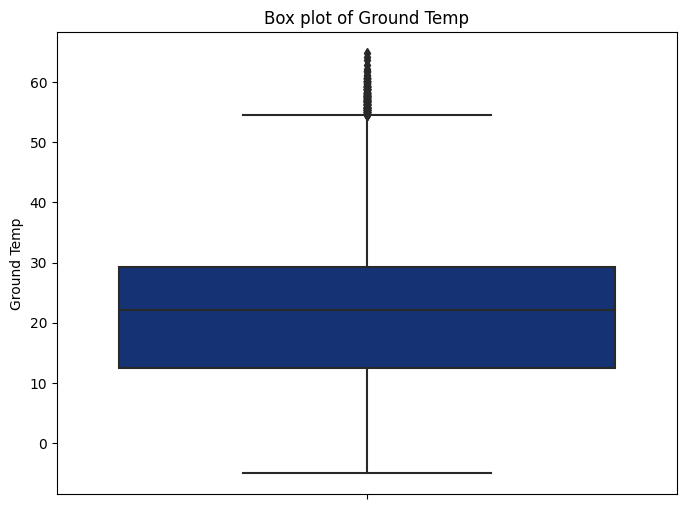

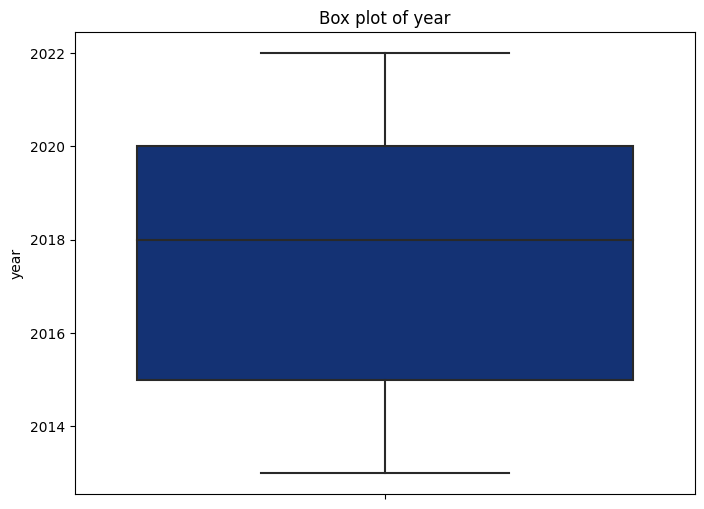

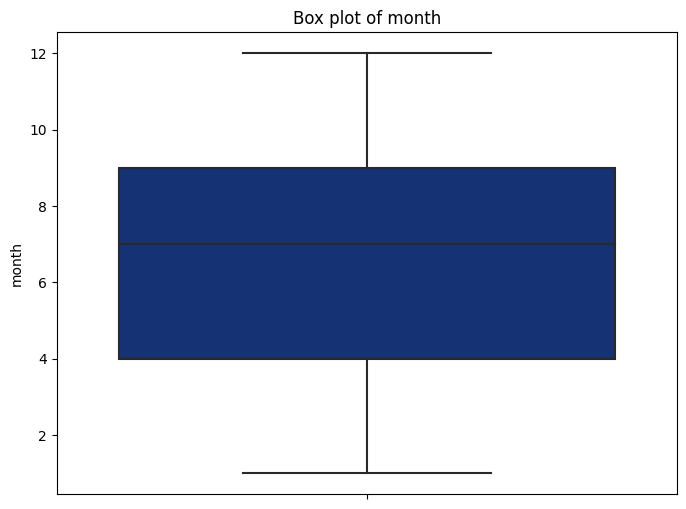

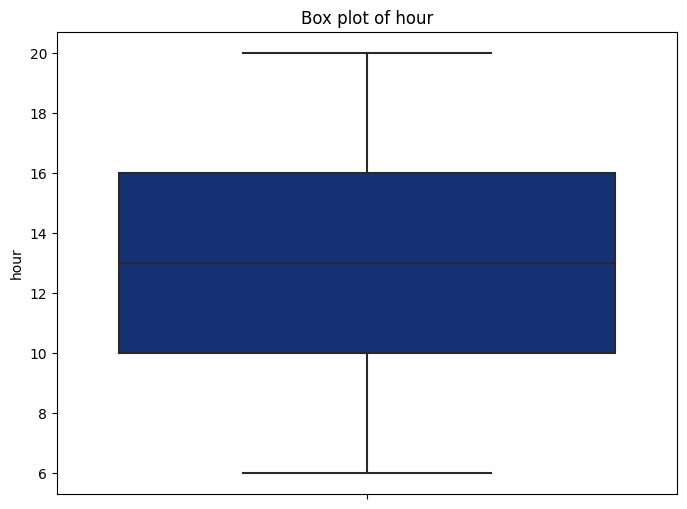

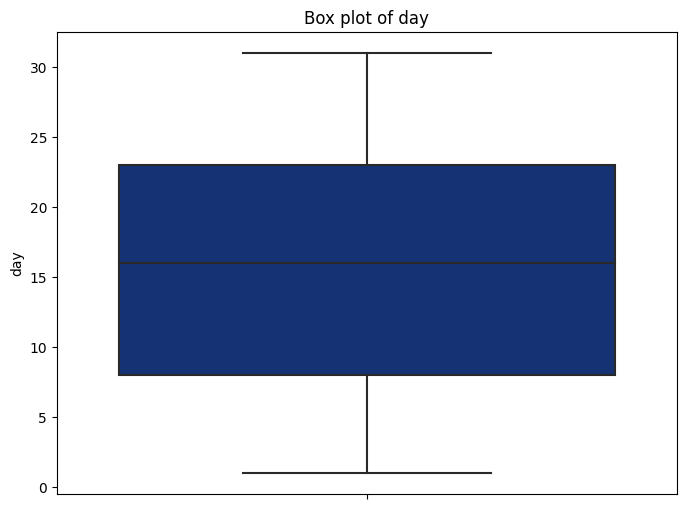

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
drop_columns = ['date', 'name', 'power/land']

all_data = all_data.drop(columns=drop_columns)
columns_to_plot = all_data.columns

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=all_data[column], color='#042c84')
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)
    plt.show()